In [2]:
# !kaggle competitions download -c new-york-city-taxi-fare-prediction


  0%|          | 0.00/1.56G [00:00<?, ?B/s]
  0%|          | 1.00M/1.56G [00:00<09:27, 2.95MB/s]
  0%|          | 2.00M/1.56G [00:00<05:41, 4.90MB/s]
  0%|          | 4.00M/1.56G [00:00<03:35, 7.74MB/s]
  0%|          | 6.00M/1.56G [00:00<03:01, 9.21MB/s]
  1%|          | 8.00M/1.56G [00:01<02:44, 10.1MB/s]
  1%|          | 10.0M/1.56G [00:01<02:35, 10.7MB/s]
  1%|          | 12.0M/1.56G [00:01<02:30, 11.1MB/s]
  1%|          | 14.0M/1.56G [00:01<02:27, 11.3MB/s]
  1%|          | 16.0M/1.56G [00:01<02:24, 11.4MB/s]
  1%|          | 18.0M/1.56G [00:01<02:22, 11.6MB/s]
  1%|▏         | 20.0M/1.56G [00:02<02:21, 11.7MB/s]
  1%|▏         | 22.0M/1.56G [00:02<02:21, 11.7MB/s]
  2%|▏         | 24.0M/1.56G [00:02<02:20, 11.7MB/s]
  2%|▏         | 26.0M/1.56G [00:02<02:19, 11.8MB/s]
  2%|▏         | 28.0M/1.56G [00:02<02:19, 11.8MB/s]
  2%|▏         | 30.0M/1.56G [00:02<02:19, 11.8MB/s]
  2%|▏         | 32.0M/1.56G [00:03<02:19, 11.8MB/s]
  2%|▏         | 34.0M/1.56G [00:03<02:19, 11.7MB/s]
 

In [5]:
import os

def convert_bytes(file_path, unit=None):
	size = os.path.getsize(file_path)
	if unit == 'KB':
		return print(f'File size: {round(size/1024, 3)} Kilobytes')
	elif unit == 'MB':
		return print(f'File size: {round(size/(1024 * 1024), 3)} Megabytes')
	elif unit == 'GB':
		return print(f'File size: {round(size/(1024 * 1024 * 1024), 3)} Gigabytes')
	else:
		return print(f'File size: {size} bytes')
	
file_path = './data-files/train.csv'
convert_bytes(file_path)
convert_bytes(file_path, 'GB')

File size: 5697178298 bytes
File size: 5.306 Gigabytes


In [13]:
dir_path = './data-files/'
file_list = os.listdir(dir_path)
file_path = [dir_path + x for x in file_list]
for file in file_path:
	print(f"The {file} size:")
	convert_bytes(file)
	convert_bytes(file, 'KB')
	convert_bytes(file, 'MB')
	convert_bytes(file, 'GB')
	print("-"*5)


The ./data-files/GCP-Coupons-Instructions.rtf size:
File size: 486 bytes
File size: 0.475 Kilobytes
File size: 0.0 Megabytes
File size: 0.0 Gigabytes
-----
The ./data-files/sample_submission.csv size:
File size: 343271 bytes
File size: 335.226 Kilobytes
File size: 0.327 Megabytes
File size: 0.0 Gigabytes
-----
The ./data-files/test.csv size:
File size: 983020 bytes
File size: 959.98 Kilobytes
File size: 0.937 Megabytes
File size: 0.001 Gigabytes
-----
The ./data-files/train.csv size:
File size: 5697178298 bytes
File size: 5563650.682 Kilobytes
File size: 5433.253 Megabytes
File size: 5.306 Gigabytes
-----


In [22]:
#데이터 시각화
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

train = pd.read_csv('./data-files/train.csv', skiprows=lambda x: x % 4 != 0, parse_dates=["pickup_datetime"])
print(train.shape)


(13855964, 8)


In [23]:
test = pd.read_csv('./data-files/test.csv')
submission = pd.read_csv('./data-files/sample_submission.csv')

In [28]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13855964 entries, 0 to 13855963
Data columns (total 8 columns):
 #   Column             Dtype              
---  ------             -----              
 0   key                object             
 1   fare_amount        float64            
 2   pickup_datetime    datetime64[ns, UTC]
 3   pickup_longitude   float64            
 4   pickup_latitude    float64            
 5   dropoff_longitude  float64            
 6   dropoff_latitude   float64            
 7   passenger_count    int64              
dtypes: datetime64[ns, UTC](1), float64(5), int64(1), object(1)
memory usage: 845.7+ MB


In [29]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9914 entries, 0 to 9913
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   key                9914 non-null   object 
 1   pickup_datetime    9914 non-null   object 
 2   pickup_longitude   9914 non-null   float64
 3   pickup_latitude    9914 non-null   float64
 4   dropoff_longitude  9914 non-null   float64
 5   dropoff_latitude   9914 non-null   float64
 6   passenger_count    9914 non-null   int64  
dtypes: float64(4), int64(1), object(2)
memory usage: 542.3+ KB


In [30]:
train.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42+00:00,-73.987130,40.733143,-73.991567,40.758092,1
1,2012-01-04 17:22:00.00000081,16.5,2012-01-04 17:22:00+00:00,-73.951300,40.774138,-73.990095,40.751048,1
2,2012-12-24 11:24:00.00000098,5.5,2012-12-24 11:24:00+00:00,0.000000,0.000000,0.000000,0.000000,3
3,2013-11-23 12:57:00.000000190,5.0,2013-11-23 12:57:00+00:00,0.000000,0.000000,0.000000,0.000000,1
4,2014-12-06 20:36:22.0000008,4.0,2014-12-06 20:36:22+00:00,-73.979815,40.751902,-73.979446,40.755481,1


In [35]:
print("Minimum Value of Train:", train['fare_amount'].min())
print("Maximum Value of Train:", train['fare_amount'].max())

Minimum Value of Train: -300.0
Maximum Value of Train: 93963.36


In [36]:
print("Fare Amount < 0:", sum(train['fare_amount']<0))
print("Fare Amount < 0:", sum(train['fare_amount']>0))

Fare Amount < 0: 610
Fare Amount < 0: 13855007


In [37]:
from collections import Counter

Counter(train['fare_amount']<0)

Counter({False: 13855354, True: 610})

In [38]:
train = train.drop(train[train['fare_amount'] < 0].index, axis=0).reset_index(drop=True)
Counter(train['fare_amount']<0)

Counter({False: 13855354})

In [45]:
Counter(train['fare_amount']>500)

Counter({False: 13855348})

In [46]:
train = train.drop(train[train['fare_amount'] > 500].index, axis=0).reset_index(drop=True)
print("Minimum Value of Train:", train['fare_amount'].min())
print("Maximum Value of Train:", train['fare_amount'].max())

Minimum Value of Train: 0.0
Maximum Value of Train: 500.0


In [51]:
print(train['passenger_count'].unique())
train['passenger_count'].value_counts()

[  1   3   6   2   5   4   0 208 129  51   8   9]


1      9580913
2      2045294
5       983346
3       607870
4       295223
6       293514
0        49160
208         18
9            6
8            2
129          1
51           1
Name: passenger_count, dtype: int64

In [52]:
train = train.drop(train[train['passenger_count'] > 6].index, axis=0).reset_index(drop=True)
train['passenger_count'].unique()

array([1, 3, 6, 2, 5, 4, 0], dtype=int64)

In [53]:
train = train.drop(train[train['passenger_count'] == 0].index, axis=0).reset_index(drop=True)
train['passenger_count'].unique()

array([1, 3, 6, 2, 5, 4], dtype=int64)

In [54]:
train['passenger_count'].value_counts(normalize=True)

1    0.693959
2    0.148144
5    0.071225
3    0.044029
4    0.021383
6    0.021260
Name: passenger_count, dtype: float64

In [60]:
#층화추출 샘플
from sklearn.model_selection import StratifiedShuffleSplit

sample = pd.DataFrame({'group' : np.repeat(['A', 'B', 'C'], (60, 40, 20))
					   , 'sample_value' : np.random.randn(120)
					   })

split = StratifiedShuffleSplit(n_splits=1, test_size=0.7, random_state=42)

for train_index, test_index in split.split(sample, sample['group']):
	strata_train_set = sample.loc[train_index]
	test_set = sample.loc[test_index]

print(sample['group'].value_counts(normalize=True))
print(sample.shape)
print(strata_train_set['group'].value_counts(normalize=True))
print(strata_train_set.shape)

A    0.500000
B    0.333333
C    0.166667
Name: group, dtype: float64
(120, 2)
A    0.500000
B    0.333333
C    0.166667
Name: group, dtype: float64
(36, 2)


In [61]:
# 본 데이터에 적용
split = StratifiedShuffleSplit(n_splits=1, test_size=0.001, random_state=42)

for large_index, sample_index in split.split(train, train['passenger_count']):
	large_df = train.loc[large_index]
	sample_df = train.loc[sample_index]

print("train:\n", train['passenger_count'].value_counts(normalize=True), train.shape)
print("sample:\n", sample_df['passenger_count'].value_counts(normalize=True), sample_df.shape)

train:
 1    0.693959
2    0.148144
5    0.071225
3    0.044029
4    0.021383
6    0.021260
Name: passenger_count, dtype: float64 (13806160, 8)
sample:
 1    0.693996
2    0.148113
5    0.071196
3    0.044036
4    0.021366
6    0.021294
Name: passenger_count, dtype: float64 (13807, 8)


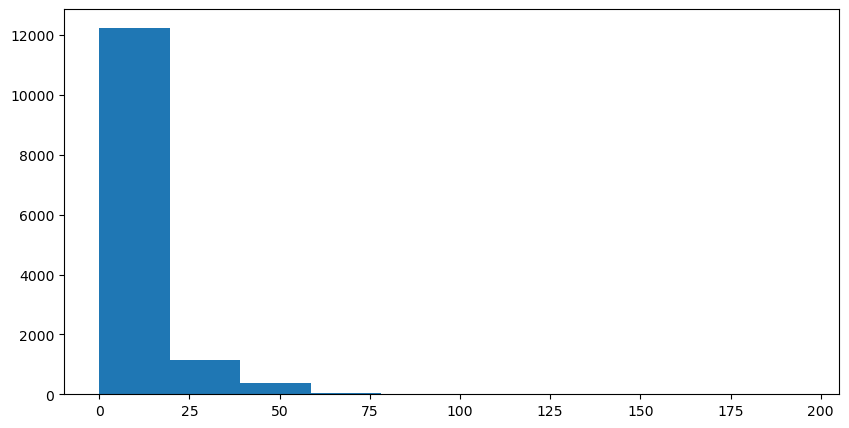

In [62]:
fig, ax= plt.subplots(figsize=(10, 5))
ax.hist(sample_df['fare_amount'])
plt.show()

In [63]:
# 위도 경도 전처리 
Counter(train['pickup_latitude'] < -90)

Counter({False: 13806091, True: 69})

In [64]:
Counter(train['pickup_latitude'] > 90)

Counter({False: 13805984, True: 176})

In [67]:
train = train.drop(train[train['pickup_latitude'] < -90].index, axis=0).reset_index(drop=True)
train = train.drop(train[train['pickup_latitude'] > 90].index, axis=0).reset_index(drop=True)
Counter(train['pickup_latitude'] > 90), Counter(train['pickup_latitude'] < -90)

(Counter({False: 13805915}), Counter({False: 13805915}))

In [68]:
train = train.drop(train[train['pickup_longitude'] < -180].index, axis=0).reset_index(drop=True)
train = train.drop(train[train['pickup_longitude'] > 180].index, axis=0).reset_index(drop=True)

train = train.drop(train[train['dropoff_latitude'] < -90].index, axis=0).reset_index(drop=True)
train = train.drop(train[train['dropoff_latitude'] > 90].index, axis=0).reset_index(drop=True)
train = train.drop(train[train['dropoff_longitude'] < -180].index, axis=0).reset_index(drop=True)
train = train.drop(train[train['dropoff_longitude'] > 180].index, axis=0).reset_index(drop=True)

In [69]:
train.shape

(13805499, 8)

In [70]:
train.iloc[:3, 0] # object

0     2012-04-21 04:30:42.0000001
1    2012-01-04 17:22:00.00000081
2    2012-12-24 11:24:00.00000098
Name: key, dtype: object

In [76]:
train.iloc[:3, 2] # pickup_datetime

0   2012-04-21 04:30:42+00:00
1   2012-01-04 17:22:00+00:00
2   2012-12-24 11:24:00+00:00
Name: pickup_datetime, dtype: datetime64[ns, UTC]

In [78]:
split = StratifiedShuffleSplit(n_splits=1, test_size=0.001, random_state=42)
for large_index, sample_index in split.split(train, train['passenger_count']):
	large_df = train.loc[large_index]
	sample_df = train.loc[sample_index]

In [85]:
Bounding_Box = (-74.5, -72.8, 40.5, 41.8)
Bounding_Box_Zoom = (-74.3, -73.7, 40.5, 40.9)

def select_within_boundingbox(data, BB):
	return (data.pickup_longitude >= BB[0]) & (data.pickup_longitude <= BB[1]) &\
		(data.pickup_latitude >= BB[2]) & (data.pickup_latitude <= BB[3]) &\
		(data.dropoff_longitude >= BB[0]) & (data.dropoff_longitude <= BB[1]) &\
		(data.dropoff_latitude >= BB[2]) & (data.dropoff_latitude <= BB[3])

In [88]:
print('Old size: %d'%len(sample_df))
sample_df = sample_df[select_within_boundingbox(sample_df, Bounding_Box)]
print('New size: %d'%len(sample_df))

Old size: 13806
New size: 13499


In [ ]:
# 에러
import ssl
from urllib.request import urlopen

context = ssl._create_unverified_context() # 연결 경고창 무시

NYC_MAP_img_path = 'https://aiblog.nl/download/nyc_-74.5_-72.8_40.5_41.8.png'
NYC_MAP = urlopen(NYC_MAP_img_path, context=context)
nyc_map = plt.imread(NYC_MAP)

NYC_MAP_ZOOM_img_path = 'https://aiblog.nl/download/nyc_-74.3_-73.7_40.5_40.9.png'
NYC_MAP_ZOOM = urlopen(NYC_MAP_ZOOM_img_path, context=context)
nyc_map_zoom = plt.imread(NYC_MAP_ZOOM)

In [133]:
import ssl
from urllib.request import urlopen
from io import BytesIO

context = ssl._create_unverified_context() # 연결 경고창 무시

NYC_MAP_img_path = 'https://aiblog.nl/download/nyc_-74.5_-72.8_40.5_41.8.png'
NYC_MAP = urlopen(NYC_MAP_img_path, context=context).read()
nyc_map = plt.imread(BytesIO(NYC_MAP))

NYC_MAP_ZOOM_img_path = 'https://aiblog.nl/download/nyc_-74.3_-73.7_40.5_40.9.png'
NYC_MAP_ZOOM = urlopen(NYC_MAP_ZOOM_img_path, context=context).read()
nyc_map_zoom = plt.imread(BytesIO(NYC_MAP_ZOOM))

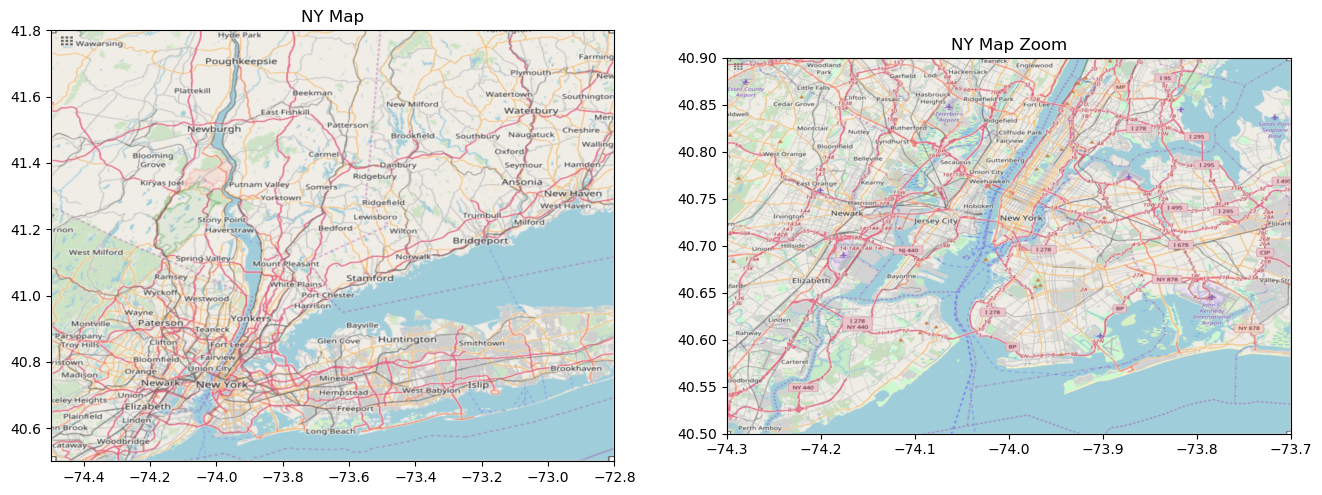

In [139]:
fig, ax = plt.subplots(1, 2, figsize=(16, 10))

ax[0].imshow(nyc_map, zorder=0, extent=Bounding_Box)
ax[0].set_title("NY Map")

ax[1].imshow(nyc_map_zoom, zorder=0, extent=Bounding_Box_Zoom)
ax[1].set_title("NY Map Zoom")

plt.show()

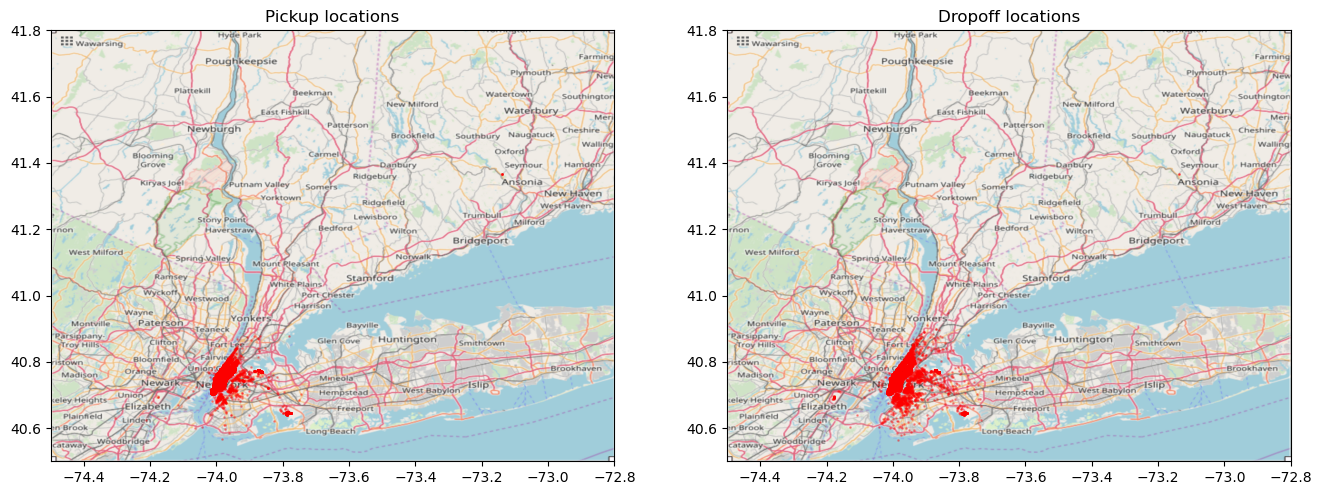

In [144]:
def scatter_plot_on_map(df, Bounding_Box, nyc_map, s=10, alpha=0.2):
	fig, axes = plt.subplots(1, 2, figsize=(16, 10))
	
	#Scatter
	axes[0].scatter(df.pickup_longitude, df.pickup_latitude, zorder=1, alpha=alpha, c='r', s=s)
	axes[0].set_xlim((Bounding_Box[0], Bounding_Box[1]))
	axes[0].set_ylim((Bounding_Box[2], Bounding_Box[3]))
	axes[0].set_title('Pickup locations')
	#Map
	axes[0].imshow(nyc_map, zorder=0, extent=Bounding_Box)

	#Scatter
	axes[1].scatter(df.dropoff_longitude, df.dropoff_latitude, zorder=1, alpha=alpha, c='r', s=s)
	axes[1].set_xlim((Bounding_Box[0], Bounding_Box[1]))
	axes[1].set_ylim((Bounding_Box[2], Bounding_Box[3]))
	axes[1].set_title('Dropoff locations')
	#Map
	axes[1].imshow(nyc_map, zorder=0, extent=Bounding_Box)

scatter_plot_on_map(sample_df, Bounding_Box, nyc_map, s=1, alpha=0.3)

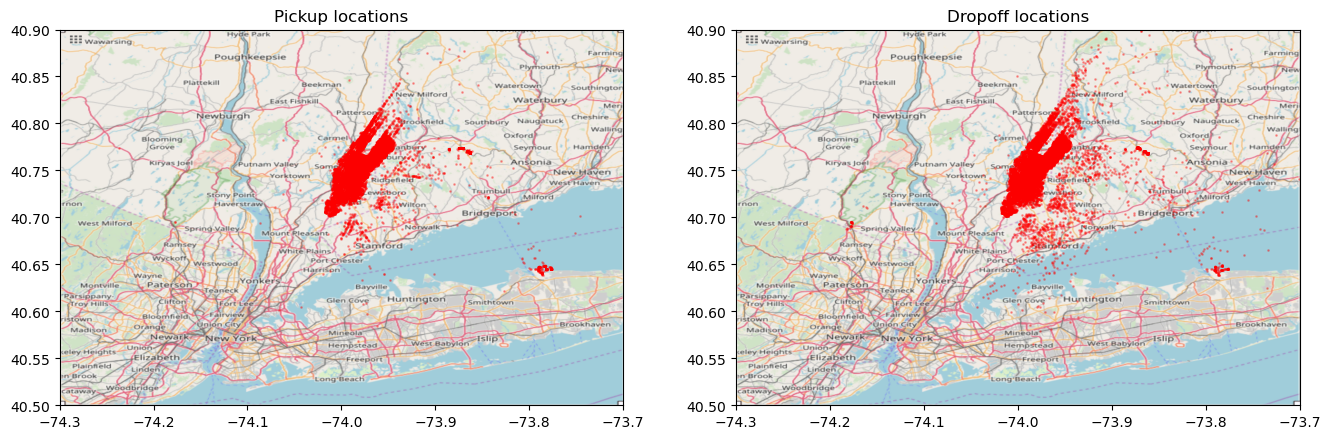

In [145]:
# 다른데로나오는데 틀린거같은데?
scatter_plot_on_map(sample_df, Bounding_Box_Zoom, nyc_map, s=1, alpha=0.3)

In [150]:
sample_df['Year'] = sample_df['pickup_datetime'].dt.year
sample_df['Month'] = sample_df['pickup_datetime'].dt.month
sample_df['Date'] = sample_df['pickup_datetime'].dt.day
sample_df['Day of week'] = sample_df['pickup_datetime'].dt.dayofweek # 월요일 = 0, 일요일 = 6
sample_df['Hour'] = sample_df['pickup_datetime'].dt.hour
print(sample_df.iloc[:, 8:])

          Year  Month  Date  Day of week  Hour
13585037  2014      1    25            5    16
11400151  2015      6    30            1    13
11073453  2014      6    27            4    22
8266036   2013     12    12            3    21
42664     2015      1    14            2    11
...        ...    ...   ...          ...   ...
12538416  2012      3    16            4    20
9310708   2012     10    16            1    19
12218000  2014      5    27            1    13
6983390   2015      1    16            4     8
6168861   2013      4     1            0    12

[13499 rows x 5 columns]


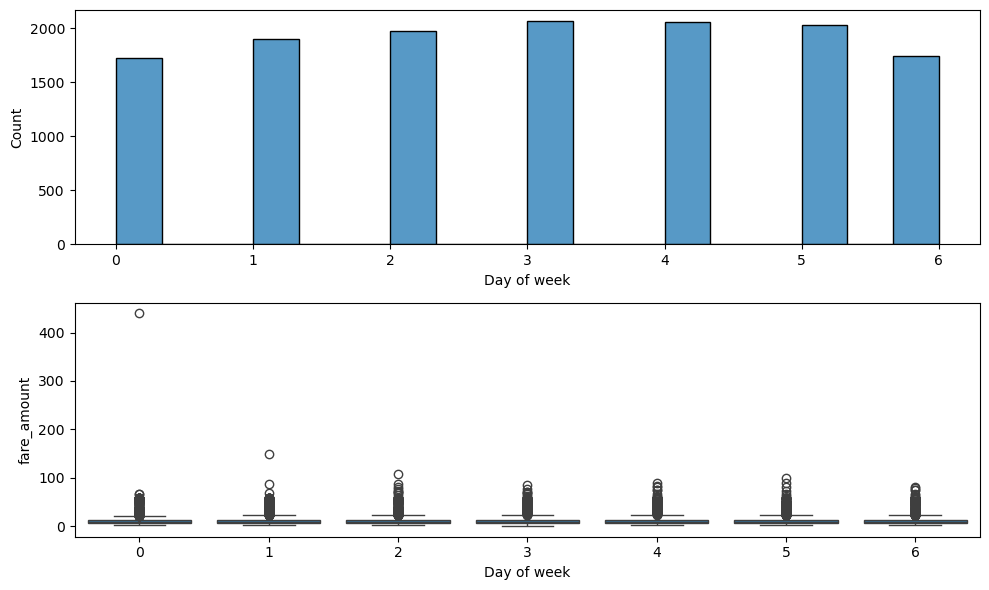

In [159]:
fig, ax = plt.subplots(2, 1, figsize=(10, 6))
sns.histplot(sample_df['Day of week'], ax=ax[0])
ax[0].set_xlabel('Day of week')
ax[0].set_ylabel('Count')

sns.boxplot(x='Day of week', y='fare_amount', data=sample_df, ax=ax[1])
ax[1].set_xlabel('Day of week')

fig.tight_layout()
plt.show()

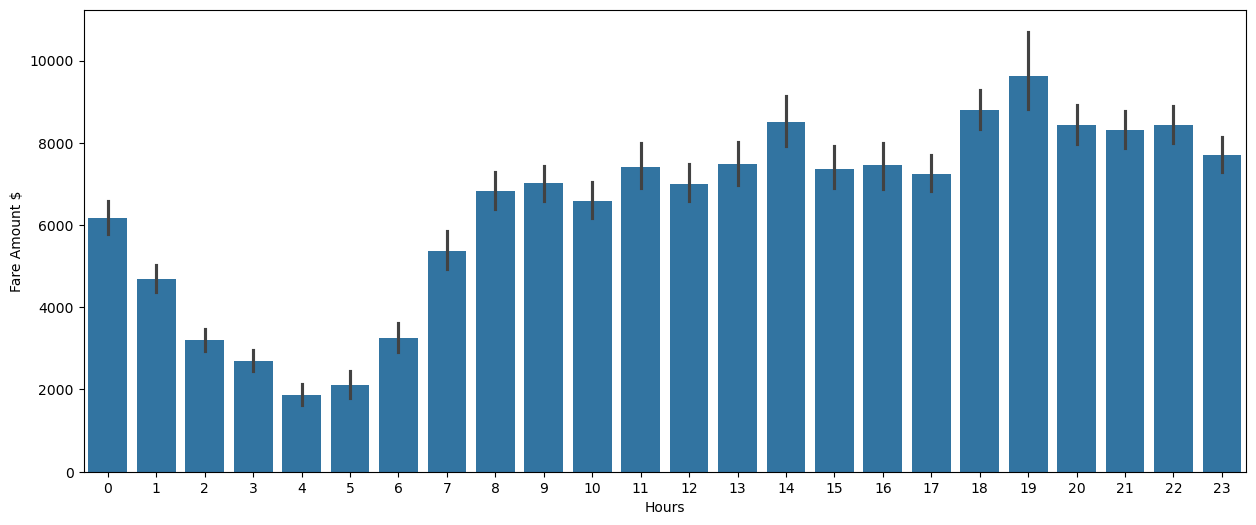

In [160]:
fig, ax = plt.subplots(figsize=(15, 6))
sns.barplot(x='Hour', y='fare_amount', data=sample_df, estimator=sum)
ax.set_xlabel('Hours')
ax.set_ylabel('Fare Amount $')

plt.show()

In [182]:
# 피쳐 엔지니어링

print("Longitude Boundary in test")
print("Minimum Value of Longitude:", min(test.pickup_longitude.min(), test.dropoff_longitude.min()))
print("Maximum Value of Longitude:", max(test.pickup_longitude.max(), test.dropoff_longitude.max()))

print("Latitude Boundary in test")
print("Minimum Value of Latitude:", min(test.pickup_latitude.min(), test.dropoff_latitude.min()))
print("Maximum Value of Latitude:", max(test.pickup_latitude.max(), test.dropoff_latitude.max()))

Longitude Boundary in test
Minimum Value of Longitude: -74.263242
Maximum Value of Longitude: -72.986532
Latitude Boundary in test
Minimum Value of Latitude: 40.568973
Maximum Value of Latitude: 41.709555


In [203]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline

# 결측값 제거
class MissingValueTransformer(BaseEstimator, TransformerMixin):

	def fit(self, X, y=None):
		return self
	
	def transform(self, X, y=None):
		X = X.drop(X[X.isnull().any(1)].index, axis=0).reset_index(drop=True)
		return X

# 이상치 제거
class OutlierTransformer(BaseEstimator, TransformerMixin):

	def fit(self, X, y=None):
		return self
	
	def transform(self, X, y=None):
		#요금이 0보다 작거나 500보다 큰 행 제거
		if 'fare_amount' in X.columns:
			X = X.drop(X[X['fare_amount'] < 0].index, axis=0).reset_index(drop=True)
			X = X.drop(X[X['fare_amount'] > 500].index, axis=0).reset_index(drop=True)

		#승객 수가 6명보다 많거나 0보다 작거나 같은 행 제거
		X = X.drop(X[X['passenger_count'] > 6].index, axis=0).reset_index(drop=True)
		X = X.drop(X[X['passenger_count'] <= 0].index, axis=0).reset_index(drop=True)

		return X

# 위도경도 전처리
class LocationTransformer(BaseEstimator, TransformerMixin):
	def __init__(self):
		self.boundary = \
			{'min_lon' : -74.263242
    		, 'max_lon' : -72.986532
    		, 'min_lat' : 40.568973
			, 'max_lat' : 41.709555
			}

	def fit(self, X, y=None):
		return self
	
	def transform(self, X, y=None):
		X.loc[~((X.pickup_longitude >= self.boundary['min_lon']) & (X.pickup_longitude <= self.boundary['max_lon']) &
		 (X.pickup_latitude >= self.boundary['min_lat']) & (X.pickup_latitude <= self.boundary['max_lat']) &
		 (X.dropoff_longitude >= self.boundary['min_lon']) & (X.dropoff_longitude <= self.boundary['max_lon']) &
		 (X.dropoff_latitude >= self.boundary['min_lat']) & (X.dropoff_latitude <= self.boundary['max_lat'])
		 ), 'is_beyond_NY'] = 1
		
		X.loc[((X.pickup_longitude >= self.boundary['min_lon']) & (X.pickup_longitude <= self.boundary['max_lon']) &
		 (X.pickup_latitude >= self.boundary['min_lat']) & (X.pickup_latitude <= self.boundary['max_lat']) &
		 (X.dropoff_longitude >= self.boundary['min_lon']) & (X.dropoff_longitude <= self.boundary['max_lon']) &
		 (X.dropoff_latitude >= self.boundary['min_lat']) & (X.dropoff_latitude <= self.boundary['max_lat'])
		 ), 'is_beyond_NY'] = 0
		
		print('Outlier vs Non Outlier Counts')
		print(X['is_beyond_NY'].value_counts())
		X = X.drop(X[X['is_beyond_NY'] == 1].index, axis=0).reset_index(drop=True)
		return X

#날짜
class DateTransformer(BaseEstimator, TransformerMixin):

	def fit(self, X, y=None):
		return self
	
	def transform(self, X, y=None):
		X['year'] = X['pickup_datetime'].dt.year
		X['month'] = X['pickup_datetime'].dt.month
		X['date'] = X['pickup_datetime'].dt.day
		X['day_of_week'] = X['pickup_datetime'].dt.dayofweek #월요일 : 0 일요일 : 6
		X['hour'] = X['pickup_datetime'].dt.hour

		return X

#쓸모없는 컬럼 제거
class ColumnTransformer(BaseEstimator, TransformerMixin):

	def fit(self, X, y=None):
		return self
	
	def transform(self, X, y=None):
		X = X.drop(['key', 'pickup_datetime'], axis=1)
		print('New Shape Size:', X.shape)
		return X
tmp = pd.DataFrame()
tmp['fare_amount'] = np.arange(-2, 700, 100)
tmp

pipe = Pipeline([
	("dropper", MissingValueTransformer())
	, ("outlier", OutlierTransformer())
	, ('location', LocationTransformer())
	, ('date', DateTransformer())
	, ('cols', ColumnTransformer())
])
pipe.fit_transform(sample_df)

Outlier vs Non Outlier Counts
0.0    13497
1.0        2
Name: is_beyond_NY, dtype: int64
New Shape Size: (13497, 17)


C:\Users\lys45\AppData\Local\Temp\ipykernel_25808\3424201177.py:11: FutureWarning: In a future version of pandas all arguments of DataFrame.any and Series.any will be keyword-only.
  X = X.drop(X[X.isnull().any(1)].index, axis=0).reset_index(drop=True)


,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,Year,Month,Date,Day of week,Hour,is_beyond_NY,year,month,date,day_of_week,hour
0,9.5,-73.988301,40.723365,-73.970528,40.750846,1,2014,1,25,5,16,0.0,2014,1,25,5,16
1,14.0,-74.003799,40.726135,-73.981010,40.750507,3,2015,6,30,1,13,0.0,2015,6,30,1,13
2,14.5,-73.987814,40.765200,-73.983463,40.726239,3,2014,6,27,4,22,0.0,2014,6,27,4,22
3,8.5,-73.962823,40.776630,-73.978922,40.761592,1,2013,12,12,3,21,0.0,2013,12,12,3,21
4,11.0,-73.970512,40.758575,-73.986641,40.745453,1,2015,1,14,2,11,0.0,2015,1,14,2,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13492,8.9,-74.005310,40.741158,-73.980388,40.736801,1,2012,3,16,4,20,0.0,2012,3,16,4,20
13493,12.0,-73.988942,40.758548,-73.955878,40.776037,1,2012,10,16,1,19,0.0,2012,10,16,1,19
13494,16.0,-73.957011,40.781126,-73.976680,40.757517,1,2014,5,27,1,13,0.0,2014,5,27,1,13
13495,13.0,-73.979851,40.765881,-73.952454,40.766232,5,2015,1,16,4,8,0.0,2015,1,16,4,8


In [204]:
from haversine import haversine, Unit

seoul = (37.532600, 127.024612)
busan = (35.114839, 129.041494)

haversine(seoul, busan)

323.89975226124534

In [207]:
sample_df[['pickup_latitude', 'pickup_longitude', 'dropoff_latitude', 'dropoff_longitude']]

,pickup_latitude,pickup_longitude,dropoff_latitude,dropoff_longitude
13585037,40.723365,-73.988301,40.750846,-73.970528
11400151,40.726135,-74.003799,40.750507,-73.981010
11073453,40.765200,-73.987814,40.726239,-73.983463
8266036,40.776630,-73.962823,40.761592,-73.978922
42664,40.758575,-73.970512,40.745453,-73.986641
...,...,...,...,...
12538416,40.741158,-74.005310,40.736801,-73.980388
9310708,40.758548,-73.988942,40.776037,-73.955878
12218000,40.781126,-73.957011,40.757517,-73.976680
6983390,40.765881,-73.979851,40.766232,-73.952454


In [211]:
pick_lon = sample_df['pickup_longitude'].tolist()
pick_lat = sample_df['pickup_latitude'].tolist()
drop_lon = sample_df['dropoff_longitude'].tolist()
drop_lat = sample_df['dropoff_latitude'].tolist()
distances = []
for row in range(len(sample_df)):
	dist = haversine((pick_lat[row], pick_lon[row]), (drop_lat[row], drop_lon[row]))
	distances.append(dist)

sample_df['distance'] = distances
print(sample_df[['fare_amount', 'distance', 'passenger_count']])

          fare_amount  distance  passenger_count
13585037          9.5  3.402934                1
11400151         14.0  3.321282                3
11073453         14.5  4.347750                3
8266036           8.5  2.152707                1
42664            11.0  1.993719                1
...               ...       ...              ...
12538416          8.9  2.154883                1
9310708          12.0  3.396364                1
12218000         16.0  3.104080                1
6983390          13.0  2.307641                5
6168861           9.0  2.418897                1

[13499 rows x 3 columns]


In [213]:
#직선 거리 도출변수 생성
class HaversineDistance(BaseEstimator, TransformerMixin):

	def fit(self, X, y=None):
		return self
	
	def transform(self, X, y=None):
		distances = []
		pick_lon = X['pickup_longitude'].tolist()
		pick_lat = X['pickup_latitude'].tolist()
		drop_lon = X['dropoff_longitude'].tolist()
		drop_lat = X['dropoff_latitude'].tolist()
		
		for row in range(len(X)):
			dist = haversine((pick_lat[row], pick_lon[row]), (drop_lat[row], drop_lon[row]))
			distances.append(dist)
		
		X['distance'] = distances
		# 위도경도 제거
		X = X.drop(['pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude'], axis=1)

		return X
	
pipe = Pipeline([('Haver', HaversineDistance())])

pipe.fit_transform(sample_df)


,key,fare_amount,pickup_datetime,passenger_count,Year,Month,Date,Day of week,Hour,distance
13585037,2014-01-25 16:41:42.0000001,9.5,2014-01-25 16:41:42+00:00,1,2014,1,25,5,16,3.402934
11400151,2015-06-30 13:28:21.0000006,14.0,2015-06-30 13:28:21+00:00,3,2015,6,30,1,13,3.321282
11073453,2014-06-27 22:35:45.0000001,14.5,2014-06-27 22:35:45+00:00,3,2014,6,27,4,22,4.347750
8266036,2013-12-12 21:20:00.000000164,8.5,2013-12-12 21:20:00+00:00,1,2013,12,12,3,21,2.152707
42664,2015-01-14 11:11:45.0000005,11.0,2015-01-14 11:11:45+00:00,1,2015,1,14,2,11,1.993719
...,...,...,...,...,...,...,...,...,...,...
12538416,2012-03-16 20:14:24.0000004,8.9,2012-03-16 20:14:24+00:00,1,2012,3,16,4,20,2.154883
9310708,2012-10-16 19:36:19.0000002,12.0,2012-10-16 19:36:19+00:00,1,2012,10,16,1,19,3.396364
12218000,2014-05-27 13:33:24.0000001,16.0,2014-05-27 13:33:24+00:00,1,2014,5,27,1,13,3.104080
6983390,2015-01-16 08:29:30.00000010,13.0,2015-01-16 08:29:30+00:00,5,2015,1,16,4,8,2.307641


In [234]:
import xgboost as xgb
import lightgbm as lgb
from sklearn.model_selection import train_test_split
import time
import datetime


pipe = Pipeline([
	("dropper", MissingValueTransformer())
	, ("outlier", OutlierTransformer())
	, ('location', LocationTransformer())
	, ('date', DateTransformer())
	, ('cols', ColumnTransformer())
	, ('haver', HaversineDistance())
])
df = pipe.fit_transform(train)
X = df.drop('fare_amount', axis=1)
y = df['fare_amount']
X.shape, y.shape

C:\Users\lys45\AppData\Local\Temp\ipykernel_25808\3424201177.py:11: FutureWarning: In a future version of pandas all arguments of DataFrame.any and Series.any will be keyword-only.
  X = X.drop(X[X.isnull().any(1)].index, axis=0).reset_index(drop=True)


Outlier vs Non Outlier Counts
0.0    13510923
1.0      294576
Name: is_beyond_NY, dtype: int64
New Shape Size: (13510923, 12)


((13510923, 8), (13510923,))

In [235]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=.2, random_state=42)
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((10808738, 8), (2702185, 8), (10808738,), (2702185,))

In [236]:
params = {'max_depth' : 5
		  , 'learning_rate' : .5
		  , 'objective' : 'reg:linear'
		  , 'eval_metric' : 'rmse'
		  , 'early_stopping_rounds' : 5
		  }
xgb_model = xgb.XGBRegressor(**params)
print(xgb_model)

start = time.time()
xgb_model.fit(X_train, y_train, eval_set=[(X_val, y_val)], verbose=True)

sec = time.time() - start
times = str(datetime.timedelta(seconds=sec)).split(".")
times = times[0]
print(times)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=5,
             enable_categorical=False, eval_metric='rmse', feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.5, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, objective='reg:linear', ...)


c:\Users\lys45\miniconda3\envs\lee\Lib\site-packages\xgboost\core.py:160: UserWarning: [01:20:27] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\objective\regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


[0]	validation_0-rmse:6.25992
[1]	validation_0-rmse:5.05641
[2]	validation_0-rmse:4.67216
[3]	validation_0-rmse:4.55212
[4]	validation_0-rmse:4.50592
[5]	validation_0-rmse:4.48245
[6]	validation_0-rmse:4.47194
[7]	validation_0-rmse:4.46467
[8]	validation_0-rmse:4.46081
[9]	validation_0-rmse:4.45696
[10]	validation_0-rmse:4.45496
[11]	validation_0-rmse:4.45292
[12]	validation_0-rmse:4.45039
[13]	validation_0-rmse:4.44828
[14]	validation_0-rmse:4.44634
[15]	validation_0-rmse:4.44492
[16]	validation_0-rmse:4.44369
[17]	validation_0-rmse:4.44148
[18]	validation_0-rmse:4.44085
[19]	validation_0-rmse:4.44000
[20]	validation_0-rmse:4.43902
[21]	validation_0-rmse:4.43743
[22]	validation_0-rmse:4.43497
[23]	validation_0-rmse:4.43364
[24]	validation_0-rmse:4.43255
[25]	validation_0-rmse:4.43190
[26]	validation_0-rmse:4.43106
[27]	validation_0-rmse:4.42975
[28]	validation_0-rmse:4.42917
[29]	validation_0-rmse:4.42854
[30]	validation_0-rmse:4.42805
[31]	validation_0-rmse:4.42708
[32]	validation_0-

In [254]:
test['pickup_datetime'] = pd.to_datetime(test['pickup_datetime'])
t = pipe.fit_transform(test)
t.info()
preds = xgb_model.predict(t)
submission['fare_amount'] = preds

submission.to_csv('xgb_model_231204_submission.csv', index=False)

Outlier vs Non Outlier Counts
0.0    9914
Name: is_beyond_NY, dtype: int64
New Shape Size: (9914, 11)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9914 entries, 0 to 9913
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   passenger_count  9914 non-null   int64  
 1   is_beyond_NY     9914 non-null   float64
 2   year             9914 non-null   int64  
 3   month            9914 non-null   int64  
 4   date             9914 non-null   int64  
 5   day_of_week      9914 non-null   int64  
 6   hour             9914 non-null   int64  
 7   distance         9914 non-null   float64
dtypes: float64(2), int64(6)
memory usage: 619.8 KB


C:\Users\lys45\AppData\Local\Temp\ipykernel_25808\3424201177.py:11: FutureWarning: In a future version of pandas all arguments of DataFrame.any and Series.any will be keyword-only.
  X = X.drop(X[X.isnull().any(1)].index, axis=0).reset_index(drop=True)


In [237]:
from sklearn.model_selection import cross_val_score, KFold

cv = KFold(n_splits=5, random_state=42, shuffle=True)
rmse_score = np.sqrt(-cross_val_score(xgb_model, X, y, scoring='neg_mean_squared_error',cv=cv))
np.mean(rmse_score)

c:\Users\lys45\miniconda3\envs\lee\Lib\site-packages\xgboost\core.py:160: UserWarning: [01:21:30] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\objective\regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
c:\Users\lys45\miniconda3\envs\lee\Lib\site-packages\xgboost\core.py:160: UserWarning: [01:21:34] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\objective\regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
c:\Users\lys45\miniconda3\envs\lee\Lib\site-packages\xgboost\core.py:160: UserWarning: [01:21:39] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\objective\regression_obj.cu:209: reg:linear is now deprecated in fav

ValueError: 
All the 5 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\lys45\miniconda3\envs\lee\Lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\lys45\miniconda3\envs\lee\Lib\site-packages\xgboost\core.py", line 729, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "c:\Users\lys45\miniconda3\envs\lee\Lib\site-packages\xgboost\sklearn.py", line 1086, in fit
    self._Booster = train(
                    ^^^^^^
  File "c:\Users\lys45\miniconda3\envs\lee\Lib\site-packages\xgboost\core.py", line 729, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "c:\Users\lys45\miniconda3\envs\lee\Lib\site-packages\xgboost\training.py", line 182, in train
    if cb_container.after_iteration(bst, i, dtrain, evals):
       ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\lys45\miniconda3\envs\lee\Lib\site-packages\xgboost\callback.py", line 241, in after_iteration
    ret = any(c.after_iteration(model, epoch, self.history) for c in self.callbacks)
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\lys45\miniconda3\envs\lee\Lib\site-packages\xgboost\callback.py", line 241, in <genexpr>
    ret = any(c.after_iteration(model, epoch, self.history) for c in self.callbacks)
              ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\lys45\miniconda3\envs\lee\Lib\site-packages\xgboost\callback.py", line 426, in after_iteration
    raise ValueError(msg)
ValueError: Must have at least 1 validation dataset for early stopping.
